In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('HistoricalQuotes.csv')

In [3]:
df.columns

Index(['date', 'close', 'volume', 'open', 'high', 'low'], dtype='object')

In [4]:
df.head()

,date,close,volume,open,high,low
0,2019/08/10,200.99,"24,619,446",201.23,202.760,199.29
1,2019/08/09,200.99,24619750.0000,201.30,202.760,199.29
2,2019/08/08,203.43,27009520.0000,200.20,203.530,199.39
3,2019/08/07,199.04,33364400.0000,195.41,199.560,193.82
4,2019/08/06,197.00,35824790.0000,196.31,198.067,194.04


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    253 non-null    object 
 1   close   253 non-null    float64
 2   volume  253 non-null    object 
 3   open    253 non-null    float64
 4   high    253 non-null    float64
 5   low     253 non-null    float64
dtypes: float64(4), object(2)
memory usage: 12.0+ KB


In [6]:
df = pd.read_csv('HistoricalQuotes.csv',parse_dates=['date'])

In [7]:
df.dtypes

date      datetime64[ns]
close            float64
volume            object
open             float64
high             float64
low              float64
dtype: object

# Check missing values

In [8]:
df.isna().sum()

date      0
close     0
volume    0
open      0
high      0
low       0
dtype: int64

In [9]:
df.set_index('date',inplace=True)

In [11]:
df = df.asfreq('B')

In [12]:
df.isna().sum()

close     10
volume    10
open      10
high      10
low       10
dtype: int64

In [13]:
df.fillna(method='ffill',inplace=True)

In [14]:
df.isna().sum()

close     0
volume    0
open      0
high      0
low       0
dtype: int64

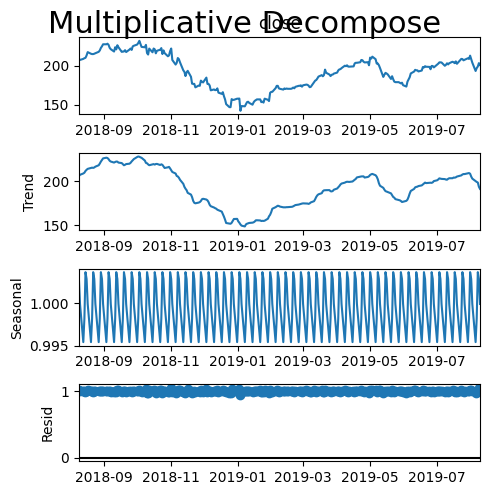

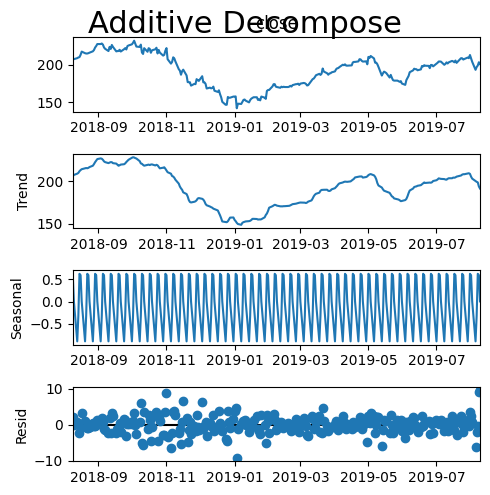

In [15]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition
result_mul = seasonal_decompose(df['close'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['close'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (5,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

# Time Series as Regression of lag values

In [16]:
df['lag1'] = df['close'].shift(1)
df['lag2'] = df['close'].shift(2)
df['lag3'] = df['close'].shift(3)
df['lag4'] = df['close'].shift(4)
df['lag5'] = df['close'].shift(5)

In [17]:
df.head(10)

,close,volume,open,high,low,lag1,lag2,lag3,lag4,lag5
date,,,,,,,,,,
2018-08-09,208.88,23389530.0000,207.280,209.7800,207.200,NaN,NaN,NaN,NaN,NaN
2018-08-10,207.53,24592460.0000,207.360,209.1000,206.670,208.88,NaN,NaN,NaN,NaN
2018-08-13,208.87,25864510.0000,207.700,210.9520,207.700,207.53,208.88,NaN,NaN,NaN
2018-08-14,209.75,20679270.0000,210.155,210.5600,208.260,208.87,207.53,208.88,NaN,NaN
2018-08-15,210.24,28595230.0000,209.220,210.7400,208.330,209.75,208.87,207.53,208.88,NaN
2018-08-16,213.32,27595310.0000,211.750,213.8121,211.470,210.24,209.75,208.87,207.53,208.88
2018-08-17,217.58,35034410.0000,213.440,217.9500,213.160,213.32,210.24,209.75,208.87,207.53
2018-08-20,215.46,30149410.0000,218.100,219.1800,215.110,217.58,213.32,210.24,209.75,208.87
2018-08-21,215.04,25682700.0000,216.800,217.1900,214.025,215.46,217.58,213.32,210.24,209.75


In [18]:
df.dropna(inplace=True)

In [19]:
df.head()

,close,volume,open,high,low,lag1,lag2,lag3,lag4,lag5
date,,,,,,,,,,
2018-08-16,213.32,27595310.0000,211.75,213.8121,211.470,210.24,209.75,208.87,207.53,208.88
2018-08-17,217.58,35034410.0000,213.44,217.9500,213.160,213.32,210.24,209.75,208.87,207.53
2018-08-20,215.46,30149410.0000,218.10,219.1800,215.110,217.58,213.32,210.24,209.75,208.87
2018-08-21,215.04,25682700.0000,216.80,217.1900,214.025,215.46,217.58,213.32,210.24,209.75
2018-08-22,215.05,18965930.0000,214.10,216.3600,213.840,215.04,215.46,217.58,213.32,210.24


In [20]:
ts_data = df.loc[:,['open']]

In [21]:
ts_data.shape

(257, 1)

In [22]:
ts_data.head()

,open
date,
2018-08-16,211.75
2018-08-17,213.44
2018-08-20,218.10
2018-08-21,216.80
2018-08-22,214.10


In [23]:
# Write a function which will take dataframe,
# column name and number of shifts
# Return new data frame with added extra columns after shifting
# also remove the rows containing na values
def shift_vals(df, col, n):
    for i in range(1,n+1):
        df['lag'+str(i)] = df[col].shift(i)
    df.dropna(inplace=True)
    new_df = df
    return new_df

In [24]:
df1 = shift_vals(df,'open',5)

In [25]:
df1.head()

,close,volume,open,high,low,lag1,lag2,lag3,lag4,lag5
date,,,,,,,,,,
2018-08-23,215.49,18505780.0000,214.65,217.05,214.60,214.10,216.80,218.10,213.44,211.75
2018-08-24,216.16,18457720.0000,216.60,216.90,215.11,214.65,214.10,216.80,218.10,213.44
2018-08-27,217.94,20400770.0000,217.15,218.74,216.33,216.60,214.65,214.10,216.80,218.10
2018-08-28,219.70,22751390.0000,219.01,220.54,218.92,217.15,216.60,214.65,214.10,216.80
2018-08-29,222.98,27074260.0000,220.15,223.49,219.41,219.01,217.15,216.60,214.65,214.10


In [26]:
df1.columns

Index(['close', 'volume', 'open', 'high', 'low', 'lag1', 'lag2', 'lag3',
       'lag4', 'lag5'],
      dtype='object')

# X and Y split

In [27]:
X = df.loc[:,['lag1','lag2','lag3','lag4','lag5']]
y = df.loc[:,'open']

In [32]:
X.shape,y.shape

((252, 5), (252,))

# Train and Test split

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=7)

In [31]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((226, 5), (26, 5), (226,), (26,))

# Apply
- Linear Regression
- Lasso
- Ridge
- ElasticNet

In [41]:
mae = {}
type(mae)

dict

# Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(X_test)

In [42]:
temp = mean_absolute_error(y_test,y_pred)
mae[lr.__class__.__name__] = temp
temp

2.5503069998039356

In [43]:
mae

{'LinearRegression': 2.5503069998039356}

<Axes: >

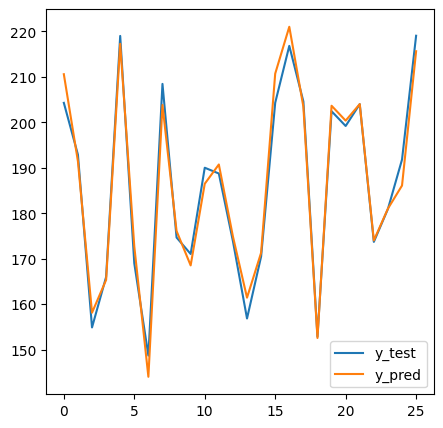

In [44]:
res = pd.DataFrame([y_test.values,y_pred]).T
res.columns = ['y_test','y_pred']
res.plot()

# Lasso

In [45]:
from sklearn.linear_model import Lasso

In [46]:
ls = Lasso()

In [47]:
ls.fit(X_train,y_train)

Lasso()

In [48]:
y_pred = ls.predict(X_test)

In [50]:
temp = mean_absolute_error(y_test,y_pred)
mae[ls.__class__.__name__] = temp
temp

2.381188291547168

<Axes: >

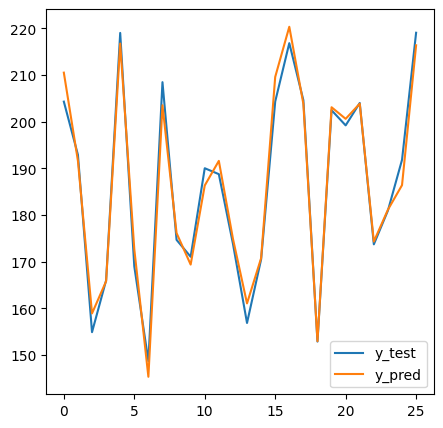

In [52]:
res = pd.DataFrame([y_test.values,y_pred]).T
res.columns = ['y_test','y_pred']
res.plot()

# Ridge

In [53]:
from sklearn.linear_model import Ridge

In [54]:
rd = Ridge()

In [55]:
rd.fit(X_train,y_train)

Ridge()

In [56]:
y_pred = rd.predict(X_test)

array([210.59007023, 191.43109884, 158.13737408, 165.34009823,
       217.27666954, 172.71059339, 144.04247564, 203.82047965,
       176.10413052, 168.53864777, 186.4917435 , 190.7361523 ,
       174.89942123, 161.44184357, 171.32333575, 210.71638649,
       221.02096584, 203.44536219, 152.57093775, 203.65162832,
       200.37978593, 204.01468566, 174.02445371, 181.02719877,
       186.09744898, 215.64366402])

In [57]:
temp = mean_absolute_error(y_test,y_pred)
mae[rd.__class__.__name__] = temp
temp

2.381188291547168

<Axes: >

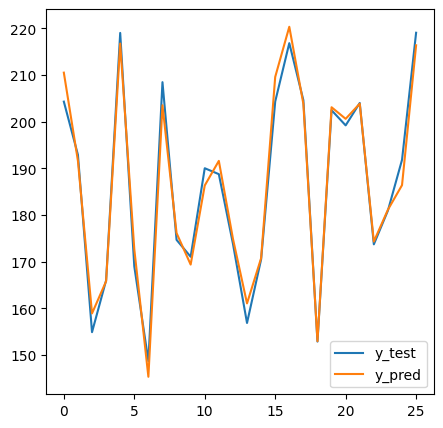

In [58]:
res = pd.DataFrame([y_test.values,y_pred]).T
res.columns = ['y_test','y_pred']
res.plot()

# ElasticNet

In [59]:
from sklearn.linear_model import ElasticNet

In [60]:
en = ElasticNet()

In [61]:
en.fit(X_train,y_train)

ElasticNet()

In [62]:
y_pred = en.predict(X_test)

In [63]:
temp = mean_absolute_error(y_test,y_pred)
mae[en.__class__.__name__] = temp
temp

2.4133364075524444

<Axes: >

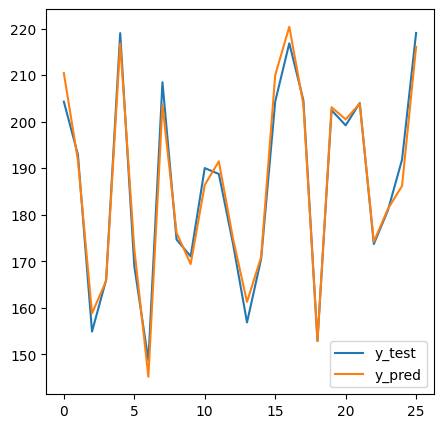

In [67]:
res = pd.DataFrame([y_test.values,y_pred]).T
res.columns = ['y_test','y_pred']
res.plot()

In [75]:
print('Mean Absolute error of applied models - ')
mae

Mean Absolute error of applied models - 


{'LinearRegression': 2.5503069998039356,
 'Lasso': 2.381188291547168,
 'Ridge': 2.381188291547168,
 'ElasticNet': 2.4133364075524444}